## Predict waist circumfrance in cm, w/ some DTI RSI measures

In [1]:
from ABCD_ML import *
import pandas as pd
import os

In [2]:
main_dr = '/home/sage/work/'

# Base data directories, 2.0 release with most of the phenotype information
nda_dr = main_dr + 'ABCD2p0NDA/'

# This folder contains the re-released 2.0.1 fixed MRI derived measurements
nda_dr2 = main_dr + 'ABCDFixRelease2p0p1/'

#This file stores the name mapping
map_file = os.path.join(nda_dr2, 'Fix Release Notes 2.0.1_Public', '24. ABCD_Release_2.0.1_Updates',
                        'abcd_2.0.1_mapping.csv')

# Target loc
target_loc = nda_dr + 'abcd_ant01.txt'

# Data loc
data_loc1 = nda_dr2 + 'mri_rsi_p102.txt'
data_loc2 = nda_dr2 + 'mri_rsi_p202.txt'

# Strat loc
strat1 = os.path.join(nda_dr, 'acspsw03.txt')

In [3]:
ML = ABCD_ML(exp_name = 'Waist_Circ',
             random_state = 1)

ML.Set_Default_Load_Params(dataset_type = 'basic',
                           eventname = 'baseline_year_1_arm_1')

exp_name = Waist_Circ
log_dr = /home/sage/ABCD_ML/Examples/Full_Examples
existing_log = append
verbose = True
exp log dr setup at: /home/sage/ABCD_ML/Examples/Full_Examples/Waist_Circ
log file at: /home/sage/ABCD_ML/Examples/Full_Examples/Waist_Circ/logs.txt
notebook = True
use_default_subject_ids = False
low memory mode = False
strat_u_name = _Strat
random state = 1
ABCD_ML object initialized
Default load params set within self.default_load_params.
----------------------
dataset_type: basic
subject_id: src_subject_id
eventname: baseline_year_1_arm_1
eventname_col: eventname
overlap_subjects: False
na_values: ['777', '999']
drop_na: True
drop_or_na: drop



## Load waist size + filter by some obvious outliers

cleared targets.

Loading /home/sage/work/ABCD2p0NDA/abcd_ant01.txt  with dataset type: basic
4951 subjects have been dropped based on passed eventname params.
Dropped 0 cols for all missing values
Dropped 17 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0

loading: anthro_waist_cm
Filtering for outliers by stds: (3, 4)
Min-Max Score (before outlier filtering): 0.0 90.0
Min-Max Score (post outlier filtering): 15.0 45.5

Dropped 50 rows based on filter input params, e.g. filter outlier percent, drop cat, ect...
Final shape:  (11808, 1)

Total valid overlapping subjects = 11808

All loaded targets
0 : anthro_waist_cm

Set to overlapping loaded subjects.
-- anthro_waist_cm --


,anthro_waist_cm
count,11808.000000
mean,26.454045
std,4.199210
min,15.000000
25%,23.500000
50%,25.500000
75%,28.500000
max,45.500000


Num. of unique vals: 277



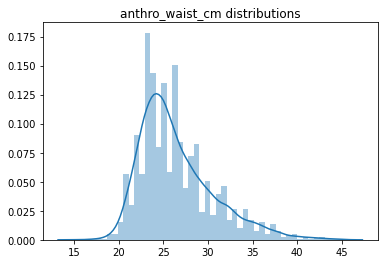

In [4]:
ML.Load_Targets(loc = target_loc,
                col_name = 'anthro_waist_cm',
                data_type = 'float',
                filter_outlier_std = (3,4),
                clear_existing = True)

ML.Show_Targets_Dist()

## Load RSI DTI data (just fiberrat, to keep # of features managable)

In [5]:
ML.Load_Data(loc = [data_loc1, data_loc2],
             inclusion_keys = ['_fiberat_'],
             filter_outlier_std = 6,
             clear_existing = True)

Cleared loaded data.

Loading /home/sage/work/ABCDFixRelease2p0p1/mri_rsi_p102.txt  with dataset type: basic
dropped ['collection_id', 'mri_rsi_p102_id', 'dataset_id', 'subjectkey', 'interview_date', 'interview_age', 'sex', 'dmri_rsi_visitid', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Loading /home/sage/work/ABCDFixRelease2p0p1/mri_rsi_p202.txt  with dataset type: basic
dropped ['collection_id', 'mri_rsi_p202_id', 'dataset_id', 'subjectkey', 'interview_date', 'interview_age', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Keeping 294 columns per passed inclusion_keys argument
Dropped 0 cols for all missing values
Dropped 659 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0
Dropped 145 rows based on filter input params, e.g. filter outlier percent, drop cat, ect...

Processing unique col values with drop threshold: 0 - warn thresh

In [6]:
ML.Show_Data_Dist()

Plotting data distribution.
Set to overlapping loaded subjects.
Viewing data with shape: (10539, 294)

Loaded data top columns by skew:
dmri_rsinds2_fiberat_fmin    -1.984486
dmri_rsinds2_fiberat_unclh   -1.705618
dmri_rsind_fiberat_fmin      -1.682619
dmri_rsint_fiberat_fmin      -1.672249
dmri_rsind_fiberat_unclh     -1.607202
                                ...   
dmri_rsints2_fiberat_cstlh    0.695660
dmri_rsints2_fiberat_unclh    0.801415
dmri_rsin0s2_fiberat_unclh    0.801769
dmri_rsin0s2_fiberat_fmin     0.976479
dmri_rsints2_fiberat_fmin     0.976839
Length: 294, dtype: float64



## Load Family ID & Sex as strat vars

In [7]:
ML.Load_Strat(loc=strat1,
              col_name='rel_family_id')

ML.Load_Strat(loc=data_loc1,
              col_name='sex')

Loading /home/sage/work/ABCD2p0NDA/acspsw03.txt  with dataset type: basic
Dropped 0 cols for all missing values
Dropped 2 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0

Total valid overlapping subjects = 10537

Loading /home/sage/work/ABCDFixRelease2p0p1/mri_rsi_p102.txt  with dataset type: basic
Dropped 0 cols for all missing values
Dropped 1 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0
Merged with existing!
New combined shape: (11397, 2)

Total valid overlapping subjects = 10537



## Define val strat on family id

In [8]:
ML.Define_Validation_Strategy(groups='rel_family_id')


Total valid overlapping subjects = 10537
Removing non overlapping subjects from loaded data, covars, ect...

CV defined with group preserving over 9000 unique values.


## Train Test Split

In [9]:
ML.Train_Test_Split(test_size = .2)

Preparing final data, in self.all_data
Any changes to loaded data, covars or strat will not be included, from now on.

Final data (w/ target) for modeling loaded shape: (10537, 297)
Performing split on 10537 subjects!
random_state: 1
Test split size: 0.2

Performed train test split
Train size: 8448
Test size:  2089


## Modelling

In [10]:
spec = Problem_Spec(problem_type = 'regression',
                    metric = ['r2', 'mae'],
                    n_jobs = 8)

ML.Set_Default_ML_Verbosity()

Default ML verbosity set within self.default_ML_verbosity.
----------------------
save_results: False
progress_bar: True
compute_train_score: False
show_init_params: True
fold_name: False
time_per_fold: False
score_per_fold: False
fold_sizes: False
best_params: False
save_to_logs: False



# Baseline w/ just linear model

In [11]:
linear_pipeline = Model_Pipeline()

results = ML.Evaluate(model_pipeline = linear_pipeline,
                      problem_spec = spec)

Model_Pipeline
--------------
scalers=\
Scaler(extra_params={}, obj='standard', params=0, scope='float')

model=\
Model(extra_params={}, obj='linear', params=0)

param_search=\
None

feat_importances=\
Feat_Importance(metric='default', n_perm=10, obj='base', shap_params=None)


Problem_Spec
------------
problem_type = regression
target = anthro_waist_cm
metric = ['r2', 'mae']
weight_metric = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs 8
random_state 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
train_subjects = train
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = linear






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.23634341429310338
Macro Std in Validation score:  0.0010761506394288411
Micro Std in Validation score:  0.020236362064473823

Metric:  neg mean absolute error
Mean Validation score:  -2.7917405776228135
Macro Std in Validation score:  0.008657664598616499
Micro Std in Validation score:  0.03150242037934



In [12]:
pipeline = Model_Pipeline(model = Model('ridge', params=1))

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

Model_Pipeline
--------------
scalers=\
Scaler(extra_params={}, obj='standard', params=0, scope='float')

model=\
Model(extra_params={}, obj='ridge', params=1)

param_search=\
None

feat_importances=\
Feat_Importance(metric='default', n_perm=10, obj='base', shap_params=None)


Problem_Spec
------------
problem_type = regression
target = anthro_waist_cm
metric = ['r2', 'mean absolute error']
weight_metric = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs 8
random_state 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
train_subjects = train
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = ridge






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.24920995168769156
Macro Std in Validation score:  0.0017485293209251324
Micro Std in Validation score:  0.023344438027403807

Metric:  neg mean absolute error
Mean Validation score:  -2.8147276648617545
Macro Std in Validation score:  0.001127991443933718
Micro Std in Validation score:  0.041314440003316494



In [13]:
# Add param search
search = Param_Search(n_iter = 50)
pipeline.param_search = search

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

Model_Pipeline
--------------
scalers=\
Scaler(extra_params={}, obj='standard', params=0, scope='float')

model=\
Model(extra_params={}, obj='ridge', params=1)

param_search=\
Param_Search(metric='default', n_iter=50, n_repeats=1,
             search_type='RandomSearch', splits=3, weight_metric=False)

feat_importances=\
Feat_Importance(metric='default', n_perm=10, obj='base', shap_params=None)


Problem_Spec
------------
problem_type = regression
target = anthro_waist_cm
metric = ['r2', 'mean absolute error']
weight_metric = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs 8
random_state 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
train_subjects = train
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = ridge0






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.24914502994002113
Macro Std in Validation score:  0.0016127708072935093
Micro Std in Validation score:  0.02344298685245124

Metric:  neg mean absolute error
Mean Validation score:  -2.8147799341425155
Macro Std in Validation score:  0.0008308023716532276
Micro Std in Validation score:  0.041452093976340275



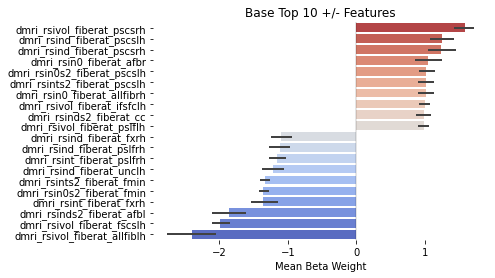

In [14]:
ML.Plot_Global_Feat_Importances()

## Let's try sex specific versions

In [ ]:
spec.subjects = Value_Subset('sex', 0)

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

subjects set to:  [('sex', 0)]

Model_Pipeline
--------------
scalers=\
Scaler(extra_params={}, obj='standard', params=0, scope='float')

model=\
Model(extra_params={}, obj='ridge', params=1)

param_search=\
Param_Search(metric='default', n_iter=50, n_repeats=1,
             search_type='RandomSearch', splits=3, weight_metric=False)

feat_importances=\
Feat_Importance(metric='default', n_perm=10, obj='base', shap_params=None)


Problem_Spec
------------
problem_type = regression
target = anthro_waist_cm
metric = ['r2', 'mean absolute error']
weight_metric = False
scope = all
subjects = Value_Subset(name=sex, value=0)
len(subjects) = 5041 (before overlap w/ train/test subjects)
n_jobs 8
random_state 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
train_subjects = train
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = ridge1



In [ ]:
spec.subjects = Value_Subset('sex', 1)

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

In [ ]:
# Back to all
spec.subjects = 'all'

## Choice of initial scaler?

### Standard scaler

In [ ]:
pipeline.scaler = Scaler('standard')

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

### Power transformer based scaler, either yeo or boxcox, since all our values are positive, we can use the faster boxcox, if we had any data points with negative values we would need to use yeo

In [ ]:
pipeline.scaler = Scaler('boxcox')

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

### Let's stick with robust scaler, even though  boxcox gives boost, its a small one + increases runtime

## Try a different search_types / hyperparameter optimizers

In [ ]:
pipeline.scaler = Scaler('robust')
pipeline.param_search.search_type = 'RandomSearch'

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

In [ ]:
pipeline.param_search.search_type = 'TwoPointsDE'

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

## We can try some other models as well

### Elastic net with param search

In [ ]:
pipeline.model = Model('elastic net', params=1)

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

### Light gradient boosting machine with param search

In [ ]:
pipeline.model = Model('light gbm', params=1)

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

### Non-linear svm (w/ rbf kernel) param search

In [ ]:
pipeline.model = Model('svm', params=1)

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

### Non-linear svm (w/ rbf kernel) param search + all features treated as hyperparams

In [ ]:
pipeline.feat_selectors = Feat_Selector('selector', params=1)

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

### Same thing but w/ ridge regression

In [ ]:
pipeline.model = Model('ridge', params=1)

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

### MLP ?

In [ ]:
pipeline.feat_selectors = None
pipeline.model = Model('mlp', params=1)

search = Param_Search('TwoPointsDE', n_param=100)
pipeline.param_search = search

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

### Elastic net w/ boxcox?

In [ ]:
pipeline.model = Model('elastic net', params=1)
pipeline.scaler = Scaler('boxcox')

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)